<a href="https://colab.research.google.com/github/surya-teja0518/Complete-Python-3-Bootcamp/blob/master/Copy_of_improving_a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/MukundVarmaT/PythonMLworkshop/master/train.csv")
data.head()

,battery_power,bluetooth/not,clock_speed,dual_sim,frontcamera,4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## running a model
using the scikit learn library we are going to run a model on this dataset as such and see what kind of accuracy we are getting

In [0]:
x=data.drop(["price_range"],axis=1)
y=data["price_range"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
training_score=accuracy_score(y_train, y_pred_train)
testing_score=accuracy_score(y_test,y_pred_test)
print("training score : ", training_score,"testing_score : ",testing_score)

training score :  0.994776119402985 testing_score :  0.7666666666666667


D:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


we can see that the training score is around 99.6 percent and the testing score is less than 80 percent. This means that the dataset is overfit. Now time to explore the given data

In [0]:
print(data.price_range.unique(),'\n')
print(data.price_range.value_counts())


[1 2 3 0] 

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


we can see that our data contains basically price ranges 0,1,2,3 and we can see that each price range has around 500 datasets. This means that our data is equally distributed hence our model is not going to be biased to anything. Lucky us phew

In [0]:
data.describe()

,battery_power,bluetooth/not,clock_speed,dual_sim,frontcamera,4g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


front camera column probably has an outlier, due to large difference in the 75% and the max values of the column. Also, the mean is getting skwed on the right side due to this.
in case of sc_w and talk_time the 75% of the values are less than one standard deviation impling a skweness towards the smaller values
three_g being a boolean variable has a mean on 0.76 showing most of the phones have three g support.

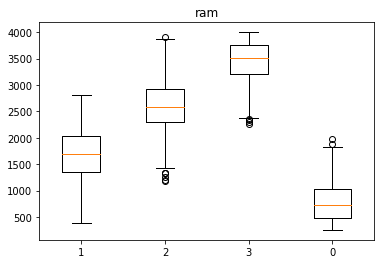

In [0]:
price_ranges=list(data["price_range"].unique())
from itertools import repeat
no=[[] for i in repeat(None,len(price_ranges))]
price_range_dict=dict(zip(price_ranges,no))

col="ram"
for i in range(len(data)):
    price_range_dict[data["price_range"][i]].append(data[col][i])


fig, ax = plt.subplots()
data_to_plot=list(price_range_dict.values())
ax.boxplot(data_to_plot)
x_labels=list(price_range_dict.keys())
ax.set_xticklabels(x_labels)
plt.title(col)
plt.show()

by using finding the box plots we can see that the column **ram** has an actual relation with price. The other features dont have any kind of relation or have a very insignificant relation

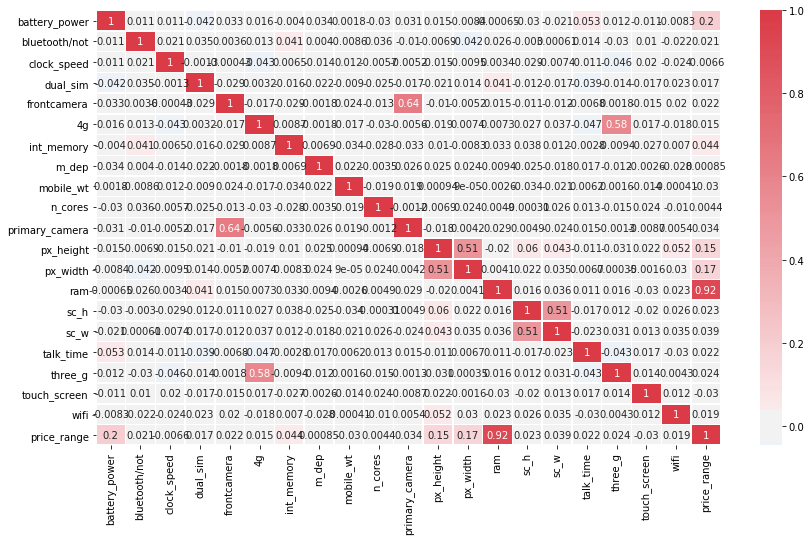

In [0]:
import seaborn as sns
plt.figure(figsize= (14,8))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
ax = sns.heatmap(data.corr(),center = 0,annot= True,linewidth=0.5,cmap= cmap)
plt.show()

**m_dep** have almost no correlation to the **price range** and hence can be dropped. (**clock_speed and n_cores** are also very less)

**primary_camera and front_camera** are positively correlated and since primary-camera correlation with price_range is more, we would like to keep primary_camera

similarly, we will be keeping **3g** and **removing 4g**.

similarly, we will be keeping **sc_w** and removing **sc_h**.

(we can do similar for **px_width and px_height but their correlation with price_Range has vey little difference** so we would like to keep them both)

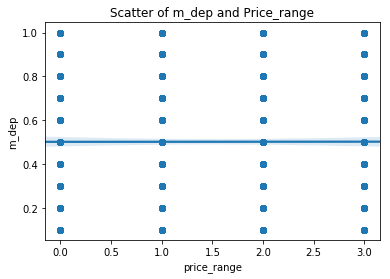

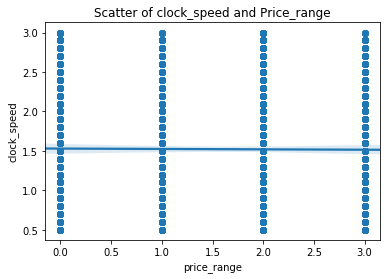

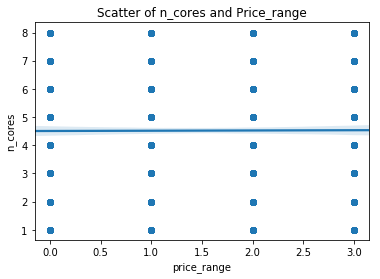

In [0]:
plt.figure()
sns.regplot(data['price_range'],data['m_dep'])
plt.title('Scatter of m_dep and Price_range')
plt.show()


plt.figure()
sns.regplot(data['price_range'],data['clock_speed'])
plt.title('Scatter of clock_speed and Price_range')
plt.show()


plt.figure()
sns.regplot(data['price_range'],data['n_cores'])
plt.title('Scatter of n_cores and Price_range')
plt.show()


In [0]:
# from this we can see that n_cores, clock speed and m_dep is not related at all with price_range hence we are going to remove them all\
data.drop(['n_cores','clock_speed','m_dep'],inplace=True,axis=1)

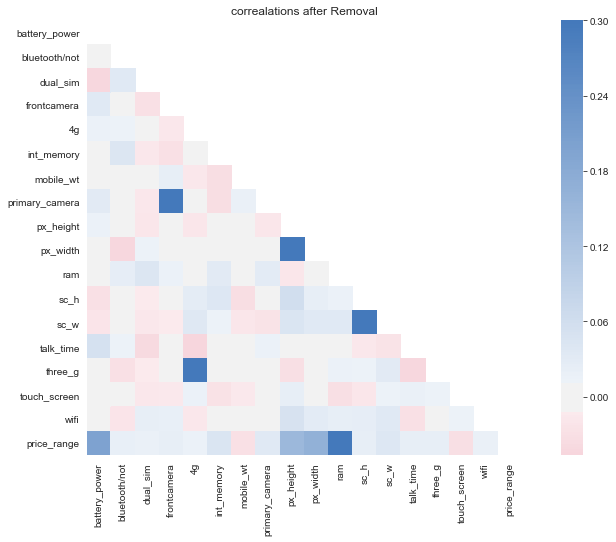

In [0]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = data.corr()
plt.figure(figsize=(14,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap=cmap,center = 0)
    plt.title('correalations after Removal')
    plt.show()

we can see that 4g and 3g are very correlated between themselves and so is 4g and three_g and sc_h and sc_w. as discussed we will be removing 4g,front_camera and sc_h

In [0]:
data.drop(['4g','sc_h','frontcamera'],inplace=True,axis=1)

<Figure size 1008x576 with 0 Axes>

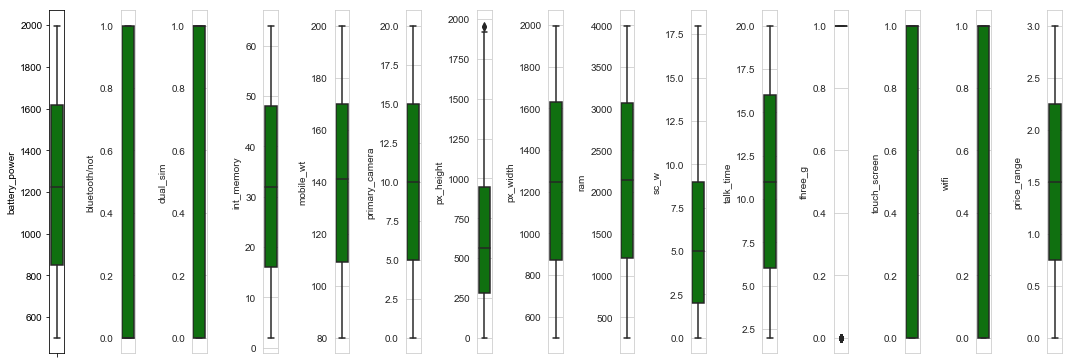

In [0]:
l = data.columns.values
number_of_columns=len(data.columns)
plt.figure(figsize=(14,8))
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]],color='green',orient='v')
    plt.tight_layout()
    


In [0]:
data.head()

,battery_power,bluetooth/not,dual_sim,int_memory,mobile_wt,primary_camera,px_height,px_width,ram,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,7,188,2,20,756,2549,7,19,0,0,1,1
1,1021,1,1,53,136,6,905,1988,2631,3,7,1,1,0,2
2,563,1,1,41,145,6,1263,1716,2603,2,9,1,1,0,2
3,615,1,0,10,131,9,1216,1786,2769,8,11,1,0,0,2
4,1821,1,0,44,141,14,1208,1212,1411,2,15,1,1,0,1


In [0]:
x=data.drop(["price_range"],axis=1)
y=data["price_range"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
training_score=accuracy_score(y_train, y_pred_train)
testing_score=accuracy_score(y_test,y_pred_test)
print("training score : ", training_score,"testing_score : ",testing_score)

training score :  0.996268656716418 testing_score :  0.8015151515151515


D:\Users\Irfan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Now we are going to perform some hyper paramter tuning and check if we can further increase the accuracy of the model

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 208, 216, 224, 232, 240, 248, 256, 264, 272, 280, 288, 296, 305, 313, 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 402, 410, 418, 426, 434, 442, 450, 458, 466, 474, 482, 490, 498, 507, 515, 523, 531, 539, 547, 555, 563, 571, 579, 587, 595, 604, 612, 620, 628, 636, 644, 652, 660, 668, 676, 684, 692, 701, 709, 717, 725, 733, 741, 749, 757, 765, 773, 781, 789, 797, 806, 814, 822, 830, 838, 846, 854, 862, 870, 878, 886, 894, 903, 911, 919, 927, 935, 943, 951, 959, 967, 975, 983, 991, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y)
print(rf_random.best_params_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   44.7s finished


{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [0]:
x=data.drop(["price_range"],axis=1)
y=data["price_range"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=725,min_samples_split=5,min_samples_leaf=1,max_features="sqrt",max_depth=90,bootstrap=False)
clf.fit(x_train,y_train)
y_pred_train=clf.predict(x_train)
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
training_score=accuracy_score(y_train, y_pred_train)
testing_score=accuracy_score(y_test,y_pred_test)
print("training score : ", training_score,"testing_score : ",testing_score)

training score :  1.0 testing_score :  0.8893939393939394


## Now we can see that i am getting a score of roughly 89 percent on the test data which implies i have done a good job